In [1]:
import networkx as nx
import plotly.graph_objects as go
import ast
import csv

In [2]:
G = nx.Graph()

with open('../exports/adjacency_2024-03-15.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        node = row[0]
        connected_nodes = ast.literal_eval(row[1])
        
        for connected_node in connected_nodes:
            G.add_edge(node, connected_node)

In [28]:
# trying to make it less dense by showing the cluster center
threshold = 4 
main_nodes = [node for node, degree in G.degree() if degree > threshold]

# subgraph for only the nodes that have > 4 edges
H = G.subgraph(main_nodes)

In [29]:
pos = nx.kamada_kawai_layout(H, dim=3)

x_nodes = [pos[node][0] for node in H.nodes()]
y_nodes = [pos[node][1] for node in H.nodes()]
z_nodes = [pos[node][2] for node in H.nodes()]

# Prepare data for edges
edge_x = []
edge_y = []
edge_z = []
for edge in H.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_z.extend([z0, z1, None])

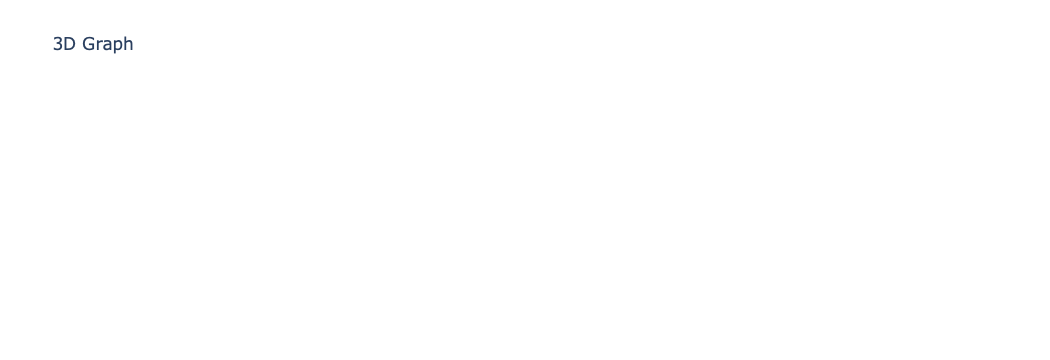

In [32]:
# trace for the edges
edge_trace = go.Scatter3d(x=edge_x, y=edge_y, z=edge_z, mode='lines',
                          line=dict(color='skyblue', width=1), hoverinfo='none')

# trace for the nodes
node_trace = go.Scatter3d(x=x_nodes, 
                          y=y_nodes, 
                          z=z_nodes, 
                          mode='markers',
                          marker=dict(size=[2 * H.degree(node) + 2 for node in H.nodes()], color='darkblue'), 
                          text=list(G.nodes()), 
                          hoverinfo='text')

layout = go.Layout(title='3D Graph', showlegend=False, scene=dict(xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                                                                          yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                                                                          zaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
fig.show()